In [84]:
import matplotlib.pyplot as plt
import numpy as np
import torch 
from torch.autograd import Variable

### first way without class api

In [86]:
xd=[1.0,2.0,3.0]
yd=[2.0,4.0,6.0]

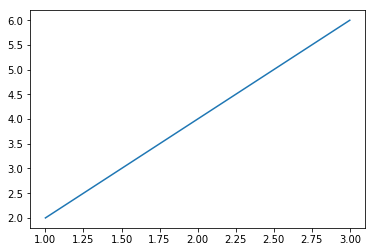

In [87]:
plt.plot(xd,yd)
plt.show()

In [117]:
w=Variable(torch.tensor([1.0]),requires_grad=True)

In [118]:
def forward(x):
    return x*w

In [119]:
def loss(x,y):
    y_=forward(x)
    return (y_-y)*(y_-y)

In [122]:
for i in range(10):
    for x,y in zip(xd,yd):
        
        l=loss(x,y)
        l.backward()
        w.data=w.data-0.01*w.grad.data[0]
        w.grad.data.zero_()

In [123]:
forward(2).data[0]

tensor(3.9279)

### second way with class api

In [124]:
xdata=Variable(torch.tensor([[1.0],[2.0],[3.0]]))
ydata=Variable(torch.tensor([[2.0],[4.0],[6.0]]))

In [125]:
class Model(torch.nn.Module):
    
    def __init__(self):
        
        super(Model,self).__init__()
        self.linear = torch.nn.Linear(1,1)
        
    def forward(self,x):
        x=self.linear(x)
        return x

In [126]:
model=Model()

In [131]:
optim=torch.optim.SGD(model.parameters(),lr=0.01)
criterion=torch.nn.MSELoss()

In [133]:
for _ in range(100):
    
    y_=model(xdata)
    loss=criterion(y_,ydata)
    
    optim.zero_grad()
    loss.backward()
    optim.step()

In [135]:
model(torch.tensor([4.0]))

tensor([ 7.8628])